In [1]:
# Perceptron is a supervised machine learning algorithm. 
# This algorithm or mathematical model is the fundamental unit of an Artificial Neural Network.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation

In [3]:
df = pd.read_csv('placement.csv')

In [4]:
print(df.shape)

(100, 3)


In [199]:
df.head()

,cgpa,resume_score,placed
0,8.14,6.52,1
1,6.17,5.17,0
2,8.27,8.86,1
3,6.88,7.27,1
4,7.52,7.30,1


In [5]:
cgpa = df['cgpa']
placed = df['placed']
resume_score = df['resume_score']

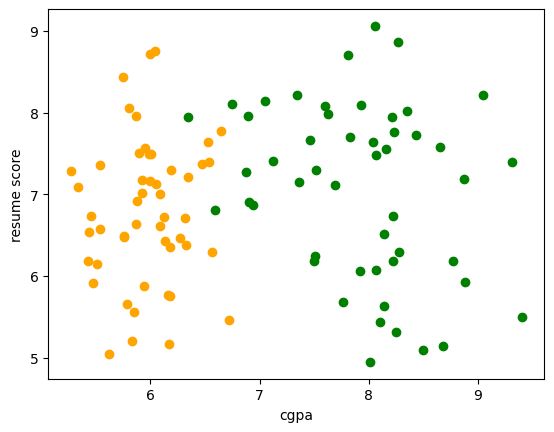

In [6]:
for i in range(cgpa.size):
    if placed[i]==1:
        plt.scatter(cgpa[i], resume_score[i], color='green')
    else:
        plt.scatter(cgpa[i], resume_score[i], color='orange')

plt.xlabel('cgpa')
plt.ylabel('resume score')
plt.show()

In [7]:
from sklearn.linear_model import Perceptron
p = Perceptron()

In [8]:
X = df.drop('placed', axis='columns')
X.head()

,cgpa,resume_score
0,8.14,6.52
1,6.17,5.17
2,8.27,8.86
3,6.88,7.27
4,7.52,7.30


In [9]:
y = placed
y.head()

0    1
1    0
2    1
3    1
4    1
Name: placed, dtype: int64

In [10]:
p.fit(X, y)

Perceptron()

In [11]:
p.coef_

array([[ 40.26, -36.  ]])

In [12]:
p.intercept_

array([-25.])

In [13]:
A = p.coef_[0][0]
B = p.coef_[0][1]
C = p.intercept_[0]

print(A, B, C)

40.26000000000006 -35.99999999999997 -25.0


In [14]:
def getParam(A, B, C):
    m = -1 * (A/B)
    c = -1 * (C/B)

    return [m, c]

In [16]:
m = getParam(A, B, C)[0]
c = getParam(A, B, C)[1]

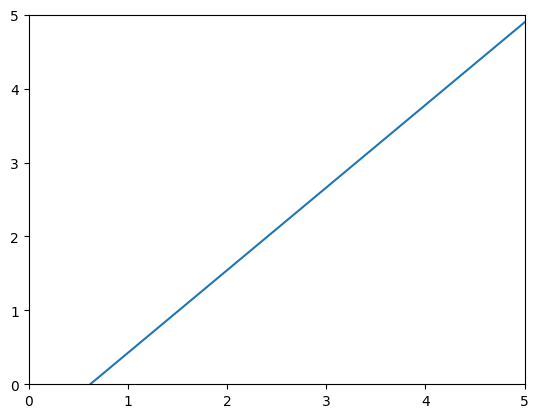

In [17]:
plt.axis([0, 5, 0, 5])
plt.axline((0, c), slope=m)

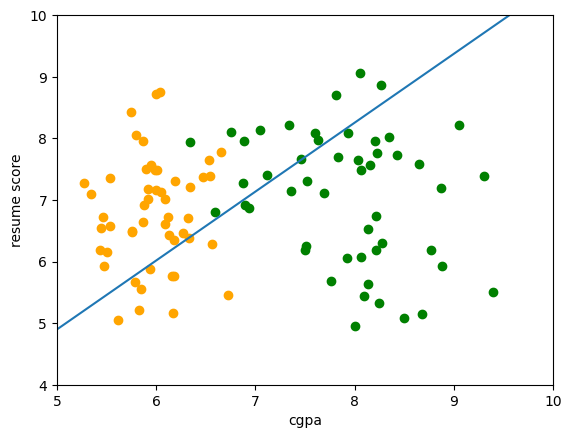

In [18]:
for i in range(cgpa.size):
    if placed[i]==1:
        plt.scatter(cgpa[i], resume_score[i], color='green')
    else:
        plt.scatter(cgpa[i], resume_score[i], color='orange')

plt.axline((0, c), slope=m)

plt.xlabel('cgpa')
plt.ylabel('resume score')
plt.axis([5, 10, 4, 10])

plt.show()

In [24]:
# Perceptron trick
lr = 0.1
epochs = 1000000

# Ax + By + C = 0
# cgpa resume 1

A1 = A
B1 = B
C1 = C

m_list = []
c_list = []

for i in range(epochs):
    rn = random.randint(0, df.shape[0]-1)
    exp = A1*df['cgpa'][rn] + B1*df['resume_score'][rn] + C1
    y_hat = 1
    if exp<0:
        y_hat = 0
    A1 = A1 + lr*(df['placed'][rn] - y_hat)*df['cgpa'][rn]
    B1 = B1 + lr*(df['placed'][rn] - y_hat)*df['resume_score'][rn]
    C1 = C1 + lr*(df['placed'][rn] - y_hat)*1
    m = getParam(A1, B1, C1)[0]
    c = getParam(A1, B1, C1)[1]
    m_list.append(m)
    c_list.append(c)

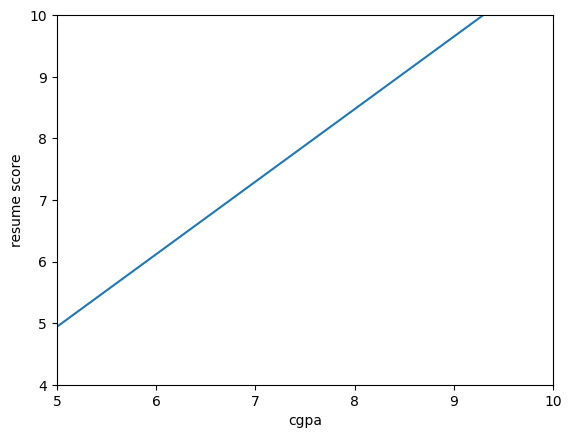

In [30]:
fig, ax = plt.subplots()
plt.xlabel('cgpa')
plt.ylabel('resume score')
plt.axis([5, 10, 4, 10])

x = np.arange(0, 100, 1)
line, = ax.plot(x, m*x + c)

def animate(i):
    line.set_ydata(m_list[i]*x + c_list[i])
    return line,

ani = FuncAnimation(fig, animate, interval = 20, blit = True, save_count = 1000)

ani.save("movie.gif", writer = "pillow")

plt.show()

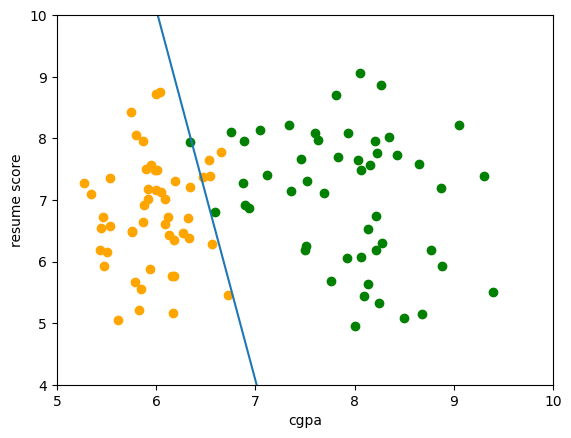

In [31]:
for i in range(cgpa.size):
    if placed[i]==1:
        plt.scatter(cgpa[i], resume_score[i], color='green')
    else:
        plt.scatter(cgpa[i], resume_score[i], color='orange')

plt.axline((0, c), slope=m)

plt.xlabel('cgpa')
plt.ylabel('resume score')
plt.axis([5, 10, 4, 10])

plt.show()